In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.shape


(1436, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
duplicated_rows=df[df.duplicated()]
duplicated_rows

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [8]:
dup=df.iloc[110:115]
dup

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
110,31000,4,4000,Diesel,116,0,2000,5,4,5,1480
111,31275,4,1500,Diesel,116,0,2000,5,4,5,1480
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
114,22950,7,10000,Diesel,116,0,2000,5,4,5,1270


In [9]:
data=df.drop_duplicates()
data.head(2)


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165


In [10]:
data.duplicated().sum()

0

In [11]:
data['Fuel_Type']=data['Fuel_Type'].astype('category')
data['Fuel_Type']=data['Fuel_Type'].cat.codes

data['Fuel_Type']

0       1
1       1
2       1
3       1
4       1
       ..
1431    2
1432    2
1433    2
1434    2
1435    2
Name: Fuel_Type, Length: 1435, dtype: int8

In [12]:
target=data[['Price']]
print(target)

      Price
0     13500
1     13750
2     13950
3     14950
4     13750
...     ...
1431   7500
1432  10845
1433   8500
1434   7250
1435   6950

[1435 rows x 1 columns]


In [13]:
features=data.drop('Price',axis=1)
print(features)

      Age_08_04     KM  Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
0            23  46986          1   90          0  2000      3          4   
1            23  72937          1   90          0  2000      3          4   
2            24  41711          1   90          0  2000      3          4   
3            26  48000          1   90          0  2000      3          4   
4            30  38500          1   90          0  2000      3          4   
...         ...    ...        ...  ...        ...   ...    ...        ...   
1431         69  20544          2   86          0  1300      3          4   
1432         72  19000          2   86          0  1300      3          4   
1433         71  17016          2   86          0  1300      3          4   
1434         70  16916          2   86          0  1300      3          4   
1435         76      1          2  110          0  1600      5          4   

      Gears  Weight  
0         5    1165  
1         5    1165  
2        

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(target,features,test_size=0.25, random_state=50)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1076, 1)
(359, 1)
(1076, 10)
(359, 10)


In [30]:
multi_LR=LinearRegression()

multi_LR.fit(x_train,y_train)
multi_LR.score(x_test,y_test)

0.24695325629224302

In [25]:
multi_LR.coef_

array([[-4.47123230e-03],
       [-5.88091123e+00],
       [-2.25690404e-06],
       [ 1.16573913e-03],
       [ 7.04591056e-07],
       [ 8.63603225e-03],
       [ 5.33272118e-05],
       [ 0.00000000e+00],
       [ 2.31786887e-06],
       [ 8.62928339e-03]])

In [26]:
multi_LR.intercept_

array([1.03998103e+02, 1.31488435e+05, 1.88945091e+00, 8.88931600e+01,
       4.35572590e-02, 1.47651108e+03, 3.48094552e+00, 4.00000000e+00,
       5.00208844e+00, 9.80152249e+02])

In [17]:
from sklearn.metrics import r2_score

y_predict=multi_LR.predict(x_test)
y_predict

array([[ 6.62161900e+01,  8.17947355e+04,  1.87038008e+00, ...,
         4.00000000e+00,  5.02167443e+00,  1.05306969e+03],
       [ 7.38172849e+01,  9.17922846e+04,  1.87421681e+00, ...,
         4.00000000e+00,  5.01773405e+00,  1.03839991e+03],
       [ 5.05668769e+01,  6.12115462e+04,  1.86248091e+00, ...,
         4.00000000e+00,  5.02978697e+00,  1.08327219e+03],
       ...,
       [-5.54708841e+00, -1.25938897e+04,  1.83415677e+00, ...,
         4.00000000e+00,  5.05887623e+00,  1.19156969e+03],
       [ 6.15213961e+01,  7.56197788e+04,  1.86801033e+00, ...,
         4.00000000e+00,  5.02410819e+00,  1.06213044e+03],
       [ 5.95093415e+01,  7.29733687e+04,  1.86699472e+00, ...,
         4.00000000e+00,  5.02515123e+00,  1.06601362e+03]])

In [18]:
r2_score(y_test,y_predict)

0.24695325629224302

In [19]:
final=pd.DataFrame(y_predict)
final

,0,1,2,3,4,5,6,7,8,9
0,66.216190,81794.735547,1.870380,98.743656,0.049511,1549.485555,3.931560,4.0,5.021674,1053.069693
1,73.817285,91792.284637,1.874217,96.761899,0.048313,1534.804300,3.840904,4.0,5.017734,1038.399912
2,50.566877,61211.546244,1.862481,102.823743,0.051977,1579.711668,4.118206,4.0,5.029787,1083.272185
3,64.204135,79148.325494,1.869364,99.268238,0.049828,1553.371769,3.955558,4.0,5.022717,1056.952871
4,39.835919,47097.359294,1.857064,105.621516,0.053668,1600.438145,4.246191,4.0,5.035350,1103.982465
...,...,...,...,...,...,...,...,...,...,...
354,67.110436,82970.917793,1.870831,98.510508,0.049370,1547.758348,3.920895,4.0,5.021211,1051.343837
355,68.451806,84735.191162,1.871509,98.160786,0.049159,1545.167539,3.904897,4.0,5.020515,1048.755052
356,-5.547088,-12593.889684,1.834157,117.453769,0.060820,1688.093872,4.787462,4.0,5.058876,1191.569692
357,61.521396,75619.778756,1.868010,99.967682,0.050251,1558.553389,3.987554,4.0,5.024108,1062.130441


Text(0, 0.5, 'Price')

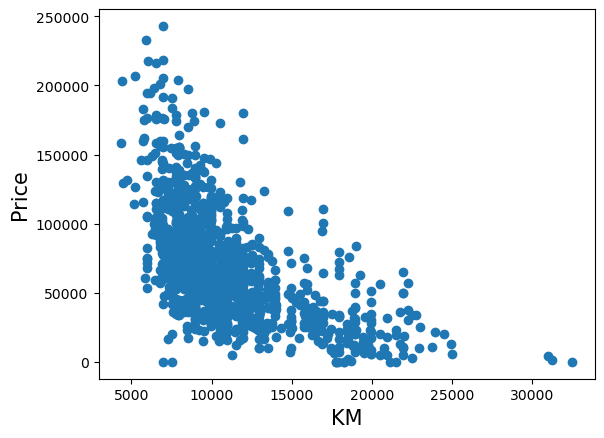

In [38]:
plt.scatter(data.Price,data.KM)
plt.xlabel('KM', size=15)
plt.ylabel('Price', size=15)

Text(0, 0.5, 'Price')

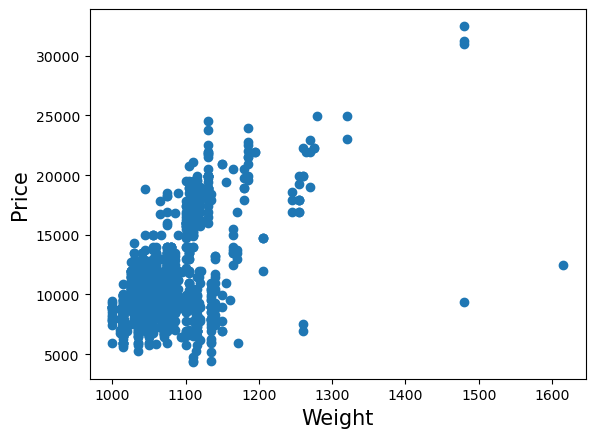

In [42]:
plt.scatter(data.Weight, data.Price,)
plt.xlabel('Weight', size=15)
plt.ylabel('Price', size=15)

In [27]:
from sklearn.linear_model import Ridge, Lasso

In [28]:
rd=Ridge()

rd.fit(x_train,y_train)
rd.score(x_test,y_test)

0.24695325629216408

In [29]:
ls=Lasso()

ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.24692368918094892

### Interview Questions:

 ##### 1.What is Normalization & Standardization and how is it helpful?

##### 2.What techniques can be used to address multicollinearity in multiple linear regression?